<a href="https://colab.research.google.com/github/ChickenRob0t/Proyecto-Covid-Meteorologia/blob/main/S_S_Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## En todo este código estructuro todas las bases de datos en un mismo formato y las uno para poder utilizarlas posteriormente

Las bases de datos son proveidas tanto por estaciones autónomas en la ZMG, y por datos de la conagua.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carga de archivos

In [ ]:
UAG_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/UAG/uag_2020_2021.txt", sep='\t')
Tet_20=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Tetlan/tetlan_2020.txt", sep='\t')
Prep_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Prepa20/prepa20_2020_2021.txt", sep='\t')

#Plaza_sol=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Pirámides/P_Sol_todos.txt", sep='\t')            Ya no tomamos plaza del Sol
#Chiv_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Chivas/chivas_2020_2021.txt", sep='\t')                  Ni Chivas
#L_R_M_E=Generador

Moli_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Molinos/molinos_2020_2021.txt", sep='\t')
#Iam_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/IAM/iam_2020_2021.txt", sep='\t')
Iam_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/IAM/IAM2_2020_2021.csv", sep=',')



<ipython-input-3-c3a34c557b6c>:1: DtypeWarning: Columns (7,9,10,16,17,18,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  UAG_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/UAG/uag_2020_2021.txt", sep='\t')
<ipython-input-3-c3a34c557b6c>:3: DtypeWarning: Columns (7,9,10,17,18,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  Prep_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Prepa20/prepa20_2020_2021.txt", sep='\t')
<ipython-input-3-c3a34c557b6c>:9: DtypeWarning: Columns (7,9,10,17,18,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  Moli_2021=pd.read_csv("/content/drive/MyDrive/Datos S.S/Data/Molinos/molinos_2020_2021.txt", sep='\t')
<ipython-input-3-c3a34c557b6c>:11: DtypeWarning: Columns (2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option 

In [ ]:
#Al parecer todos tienen el problema de que la primera y segunda fila son los headers pero están separadas cx
Estaciones=[UAG_2021,Tet_20,Prep_2021,Moli_2021,Iam_2021,]
Esta_str=['UAG_2021','Tet_20','Prep_2021','Moli_2021','Iam_2021']

In [ ]:
for est in Estaciones:

  c=list(i+'_'+j for (i,j) in zip(est.columns, est.iloc[0]) )
  est.columns=c
  est.drop([0], axis=0, inplace=True)
#Esta parte hace que la primera y segunda fila se unan y creen un solo header

In [ ]:
#Esta parte elimina los espacios vacíos, puntos y los 'Unnamed'
for estacion in Estaciones:
  s=[]
  for i in estacion.columns:

    i = "".join(filter(lambda char: not char.isdigit(), i))

    s.append(((i.replace(' ','')).replace('Unnamed:', '')).replace('.',''))



  estacion.columns=s


In [ ]:
#Sacando los máximos valores de estas variables para cada día
sirven=['Hi_Temp','In_Hum','Out_Hum','Wind_Speed','Hi_Speed','Solar_Rad']
maximos={}
dias=Estaciones[0]['_Date'].unique()


In [ ]:
def max_min(DF,columnas,col_fecha): #DF es el dataframe de la estación, columnas es un array con el nombre de las columnas que nos interesan, y el nombre de
  max=[[],[],[],[],[],[]]               #la columna de las fechas para sacar cuáles son (Dentro del dataframe debe de estar la fecha)
  min=[[],[],[],[],[],[]]

  dias=DF[col_fecha].unique()
  auxiliar=DF[columnas]


  for l in columnas:
    auxiliar[l]=auxiliar[l].replace({'---':0})
    auxiliar[l]=auxiliar[l].astype(float)     #Esto podría hacerlo un MAP sobre estaciones y evitarlo aquí


  DF[columnas]=auxiliar

  for k in dias:
    c=0
    for j in columnas:

      max[c].append( DF[j].loc[ DF[col_fecha]==k].max()  )
      min[c].append( DF[j].loc[ DF[col_fecha]==k].min()  )

      c+=1
  return (max,min)


In [ ]:
cols=['_Date','_Time','Hi_Temp','Low_Temp','In_Hum','Out_Hum','Wind_Speed','Hi_Speed','Solar_Rad']

In [ ]:

#Dejamos sólo las columnas que nos interesan y de Plaza del sol tomamos sólo los datos de 2020
Acortadas=[i[cols] for i in Estaciones]
#Acortadas[3]= Acortadas[3].loc[ (Acortadas[3]['_Date'].str.contains('01/20') ) | ( Acortadas[3]['_Date'].str.contains('02/20') )] Esta era para plaza del sol cx


In [ ]:
Acortadas=list(map(lambda x: x.reset_index(drop=True) , Acortadas ) )
Acortadas=list(map(lambda x: x.sort_values(by='_Date'), Acortadas))


In [ ]:
dias={}
cont=0
for l in Acortadas:
  dias[Esta_str[cont]]=[ l['_Date'][1] , list( l['_Date'].tail(1) )[0],len(l._Date.unique()) ]



  cont+=1
#Entrega un diccionario con la fecha inicial, final y la cantidad de días

In [ ]:
dias

{'UAG_2021': ['01/01/20', '31/12/20', 212],
 'Tet_20': ['01/01/20', '31/01/20', 63],
 'Prep_2021': ['01/01/20', '31/12/20', 165],
 'Moli_2021': ['01/01/20', '31/12/20', 128],
 'Iam_2021': ['01/01/2020', '31/12/2021', 729]}

In [ ]:
Esta_dict=dict(zip( [i for i in range(len(Esta_str))] , Esta_str  ) )
Esta_dict

{0: 'UAG_2021', 1: 'Tet_20', 2: 'Prep_2021', 3: 'Moli_2021', 4: 'Iam_2021'}

In [ ]:
#Sacando los máximos y mínimos
maximos=[[],[],[],[],[],[],[]]
minimos=[[],[],[],[],[],[],[]]

for i in range(len(Esta_str)):
  a,b=max_min(Acortadas[i],sirven,'_Date')
  maximos[i].append(a)
  minimos[i].append(b)

In [ ]:
Maximos_Estaciones=[]
s=0

for i in range(len(Esta_str)):
  Nuevo=pd.DataFrame()
  Nuevo['Date']=Acortadas[i]['_Date'].unique()

  for j in range(len(sirven)):
    Nuevo[sirven[j]]=maximos[i][0][j]

  Nuevo['Date']=pd.to_datetime(Nuevo['Date'])
  Nuevo.sort_values(by='Date')
  Nuevo=Nuevo.set_index('Date')

  Maximos_Estaciones.append(Nuevo)

#Ahora sí, dentro de Maximos_Estaciones, a cada estación tiene sus máximos y mínimos de los valores que necesitamos, para cada día del 2020 en adelante


<ipython-input-16-70e4aed94c39>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Nuevo['Date']=pd.to_datetime(Nuevo['Date'])


In [ ]:
Esta_dict

{0: 'UAG_2021', 1: 'Tet_20', 2: 'Prep_2021', 3: 'Moli_2021', 4: 'Iam_2021'}

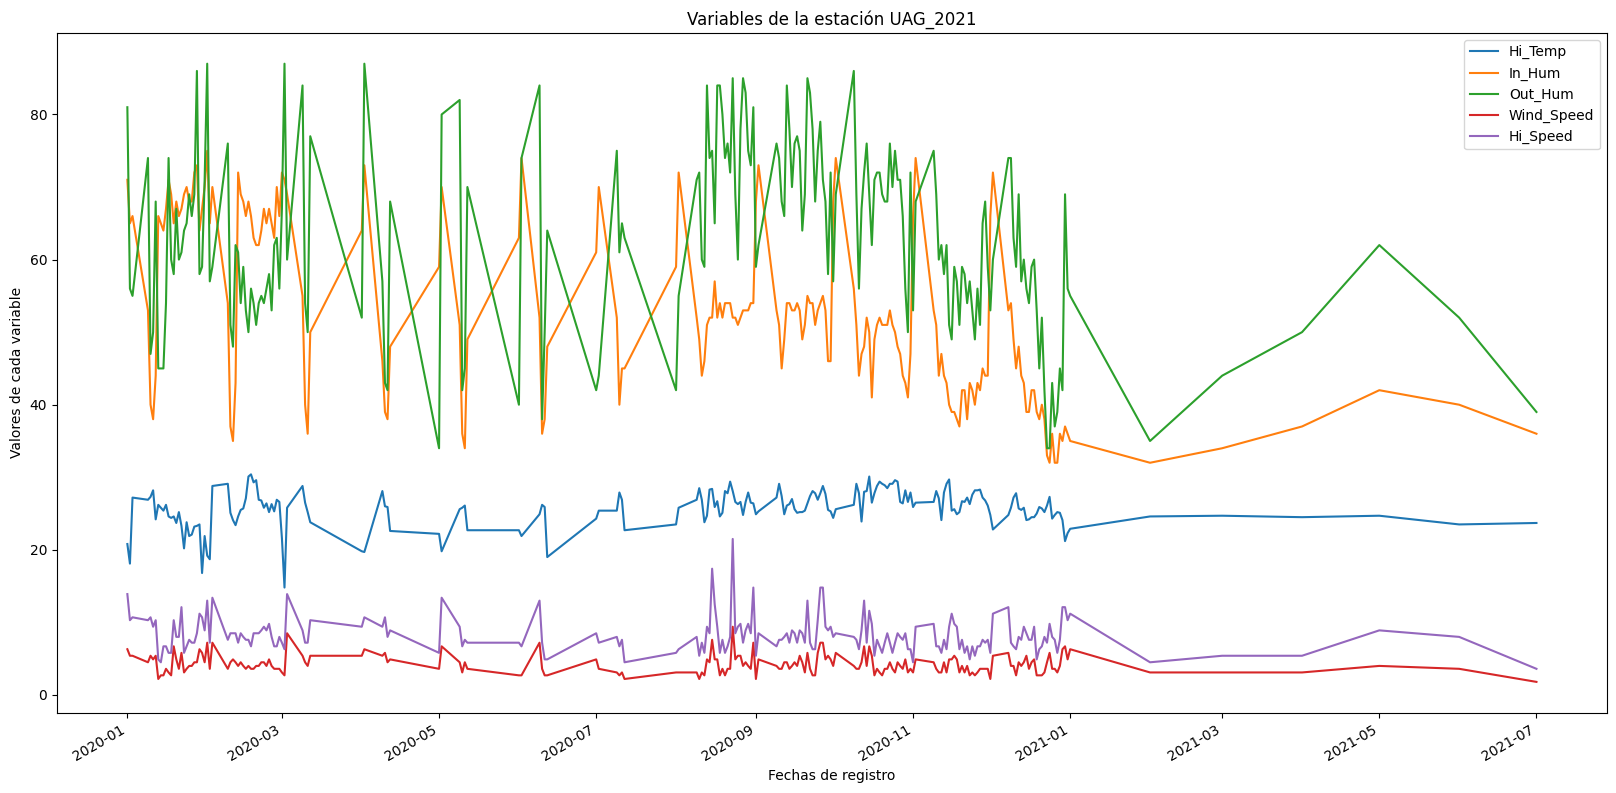

In [ ]:
est=0
Maximos_Estaciones[est].plot.line(y=['Hi_Temp', 'In_Hum', 'Out_Hum','Wind_Speed','Hi_Speed'], figsize=(20,10))
plt.xlabel('Fechas de registro')
plt.ylabel('Valores de cada variable')
plt.title('Variables de la estación '+ str(Esta_str[est]))
#Aquí, supongo que tendré que asignarle a cada una los datos de la estación, los contagios y esa onda, igual y podría hacer una intersección de los datos (Left o right join) en el cual
#Ponga las fechas de los casos de coronavirus junto con sus valores de las variables, debería hacer para cada uno esto, hacemos una función que lo aplique y se lo aplicamos a todas
#L_R_M_E=Generador
#También para después lo que quiere del mapa de los casos de coronavirus y las variables pensar cómo le podría hacer jaja xd, tengo que mostrar los casos, fechas y variables (Temperatura, radiación, etc.)
plt.savefig('Ejemplo_est.png',dpi=200)


# Aquí voy a cortar el dataset de la conagua

In [ ]:
Conag=pd.read_excel("/content/drive/MyDrive/Datos S.S/Data/Conagua/Datos CONAGUA_2019-2022.xlsx")

In [ ]:
local=Conag['STN-NAME'].unique() #Diferentes nombres de las estaciones

local=np.delete(local,4)  #Quitamos zapotlanejo
local


array(['ACATLAN DE JUAREZ, ACATL', 'GUADALAJARA (DGE), GUADA',
       'TLAQUEPAQUE, TLAQUEPAQUE', 'ZAPOPAN, ZAPOPAN', 'TONALA, TONALA'],
      dtype=object)

In [ ]:
Conag_est=[]

for i in local:
  Conag_est.append( Conag.loc[Conag['STN-NAME']== i] )

#Cada elemento de esta lista son todos los valores de la estación

In [ ]:
#Acatlán tiene hasta agosto 2021 y Zapopan hasta febrero 2021

In [ ]:
#Hay datos hasta agosto del 2021 en Acatlán, y en los demás hay hasta 2022 Febrero
Elementos=['Temp, daily obs', 'Temp, daily max', 'Temp, daily min','Precip, daily']              #Sólo las variables que nos interesan

In [ ]:
Conag_est=list(map(lambda x: x.loc[(x['YEAR-MONTH'].str.contains('2020') ) | ( x['YEAR-MONTH'].str.contains('2021')   ) ], Conag_est) ) #Filtramos sólo lo del año 2020 y 2021
Conag_est=list(map(lambda x: x.reset_index(), Conag_est))   #Además, reseteamos el índice de cada base de datos

In [ ]:
Conag_acortadas=list(map(lambda x: x.loc[x['ELEMENT-NAME'].isin(Elementos) ],Conag_est ) ) #Tomamos sólo los valores de los elementos que nos importan


In [ ]:
Conagua_dict=dict(zip([i for i in range(len(Conag_acortadas))], local )) #Para recordar en los dataframes a cuál pertenece cada una
Conagua_dict

{0: 'ACATLAN DE JUAREZ, ACATL',
 1: 'GUADALAJARA (DGE), GUADA',
 2: 'TLAQUEPAQUE, TLAQUEPAQUE',
 3: 'ZAPOPAN, ZAPOPAN',
 4: 'TONALA, TONALA'}

In [ ]:
#Lo siguiente que vamos a hacer aquí, es convertir los value-1,2,... en columnas con las fechas y ponerlas tipo fecha, para que quede con la misma estructura que el dataframe de arriba

In [ ]:
days=Conag_acortadas[0].columns[7:]
Numeros=list(Conag_acortadas[0].columns[:7])
for i in range(len(days)):

  Numeros.append(days[i][6:])

In [ ]:
for k in range(len(local)):
  Conag_acortadas[k].set_axis(Numeros, axis='columns', inplace=True)


<ipython-input-30-6687e4fe16dd>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Conag_acortadas[k].set_axis(Numeros, axis='columns', inplace=True)
<ipython-input-30-6687e4fe16dd>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Conag_acortadas[k].set_axis(Numeros, axis='columns', inplace=True)
<ipython-input-30-6687e4fe16dd>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Conag_acortadas[k].set_axis(Numeros, axis='columns', inplace=True)
<ipython-input-30-6687e4fe16dd>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Conag_acortadas[k].set_

In [ ]:
#Hay un problema que en las listas, los números de las variables 1,2,3,5,18 algunos tienen espacios y así, por tanto no se pueden iterar bien, ahora lo que hacemos es hacer que todas tengan un mismo formato 'número'

def replace(x):
  x=str(x).replace(" ","")
  return int(x)

for k in range(len(Conag_acortadas)):
  Conag_acortadas[k]['ELEMENT-CODE']=list( map( replace, Conag_acortadas[k]['ELEMENT-CODE']) )



<ipython-input-31-b32c3bc4d8cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Conag_acortadas[k]['ELEMENT-CODE']=list( map( replace, Conag_acortadas[k]['ELEMENT-CODE']) )


In [ ]:
list( map( replace, Conag_acortadas[1]['ELEMENT-CODE']) ).count(1)

23

##*Aquí acomodo los datos del conagua para que tengan la misma estructura que la otra base de datos*

In [ ]:
cosilla=pd.DataFrame()

In [ ]:
Esta_variables=[]
for k in range(len(Conag_acortadas)):
  var=[]
  for i in Elementos:
    aux_2=[]
    aux=Conag_acortadas[k].loc[Conag_acortadas[k]['ELEMENT-NAME']==i]

    for j in range(len(aux)):

      aux_2+=list(aux.iloc[j,7:])

    var.append(aux_2)

  Esta_variables.append(var)



In [ ]:
#Esta_variables[0][1] #El primer número es la base de datos, el segundo es la variable

In [ ]:
len(Esta_variables[0][1])   #El primer número entrega de cuál dataset es y el segundo cuál variable (hay 5 estaciones y 5 variables)

620

In [ ]:
treinta=[]  #Aquí hacemos una lista con los 31 días para cada mes que pone el dataset
for año in [2020,2021]:
  for mes in range(1,13):
    for dia in range(1,32):
      treinta.append(str(año)+'-'+str(mes)+'-'+str(dia))


In [ ]:
variables_conag=['Temp_obs', 'Temp_max', 'Temp_min','Precip']
conag_esp=[]


for esta in range(len(Conag_acortadas)):
  cosilla=pd.DataFrame()

  for i in range(len(variables_conag)):

    if esta==1:
      cosilla['Date']=treinta[:403]+treinta[434:]             #Caso específico de Guadalajara en el cual no está febrero cx

    else:
      cosilla['Date']= treinta[:len(Esta_variables[esta][i])]


    cosilla[variables_conag[i]]=Esta_variables[esta][i]

  conag_esp.append(cosilla)



In [ ]:
#Ahora como todos los meses los puso como si tuvieran 31 días, debemos quitar los meses que no tengan 31 días

for i in range(len(conag_esp)):
  id=conag_esp[i].loc[conag_esp[i]['Temp_max']==-99999.0].index

  conag_esp[i].drop(id, inplace=True)

  id_2=conag_esp[i].loc[conag_esp[i]['Temp_min']==-99999.0].index
  conag_esp[i].drop(id_2, inplace=True)

  id_3=conag_esp[i].loc[conag_esp[i]['Precip']==-99999.0].index
  conag_esp[i].drop(id_3, inplace=True)

In [ ]:
def date(x):
  x['Date']=pd.to_datetime(x['Date'])
  return x

In [ ]:
cosa1=list(map(lambda x: x.reset_index(drop=True) , conag_esp) )
#cosa1=list(map(date , conag_esp) ) #Me aparece que disque tengo 31 días en junio 2020- 06-31
cosa1=list(map(lambda x: x.set_index('Date'), conag_esp))

In [ ]:
Conagua_dict

{0: 'ACATLAN DE JUAREZ, ACATL',
 1: 'GUADALAJARA (DGE), GUADA',
 2: 'TLAQUEPAQUE, TLAQUEPAQUE',
 3: 'ZAPOPAN, ZAPOPAN',
 4: 'TONALA, TONALA'}

In [ ]:
#Otra vez ya tengo todas las estaciones que necesitamos con sus valores importantes de ambos años#L_R_M_E=Generador
est=1
conag_esp[est].plot.line(y=['Temp_max','Temp_min','Precip'], figsize=(20,10))
plt.xlabel('Fechas de registro')
plt.ylabel('Valores de cada variable')
plt.title('Variables de la estación '+ str(Conagua_dict[est]))
plt.savefig('Ejemplo_conag.png',dpi=200)

NameError: ignored

In [ ]:
#Notas de partes del programa con más importancia
#Aquí sirve el conag_esp[n] con n de 0-4 y su respectivo diccionario Conagua_dict
#Además de Maximos_Estaciones[n] con n 0-4 y su diccionario Esta_dict
